In [2]:
import numpy as np
import pandas as pd
import pylab as pl

%matplotlib inline

filename_test = 'test.csv'
filename_train = 'train.csv'
filename_store = 'store.csv'

train = pd.read_csv(filename_train, header=0, low_memory=False)

test = pd.read_csv(filename_test, header=0, low_memory=False)


store = pd.read_csv(filename_store, header=0, low_memory=False)



In [3]:
train['Date'] = pd.to_datetime(train['Date'])

test['Date'] = pd.to_datetime(test['Date'])


In [5]:
for data_name, data in {'TRAIN': train, 'TEST': test, 'STORE': store}.items():
    print(data_name)
    for attribute in data.columns:
        mask = data[attribute].isnull()
        print('%4d' % len(data[attribute][mask].tolist()), 'missing values in ', attribute) 
    print()


TRAIN
   0 missing values in  Store
   0 missing values in  DayOfWeek
   0 missing values in  Date
   0 missing values in  Sales
   0 missing values in  Customers
   0 missing values in  Open
   0 missing values in  Promo
   0 missing values in  StateHoliday
   0 missing values in  SchoolHoliday

STORE
   0 missing values in  Store
   0 missing values in  StoreType
   0 missing values in  Assortment
   3 missing values in  CompetitionDistance
 354 missing values in  CompetitionOpenSinceMonth
 354 missing values in  CompetitionOpenSinceYear
   0 missing values in  Promo2
 544 missing values in  Promo2SinceWeek
 544 missing values in  Promo2SinceYear
 544 missing values in  PromoInterval

TEST
   0 missing values in  Id
   0 missing values in  Store
   0 missing values in  DayOfWeek
   0 missing values in  Date
  11 missing values in  Open
   0 missing values in  Promo
   0 missing values in  StateHoliday
   0 missing values in  SchoolHoliday



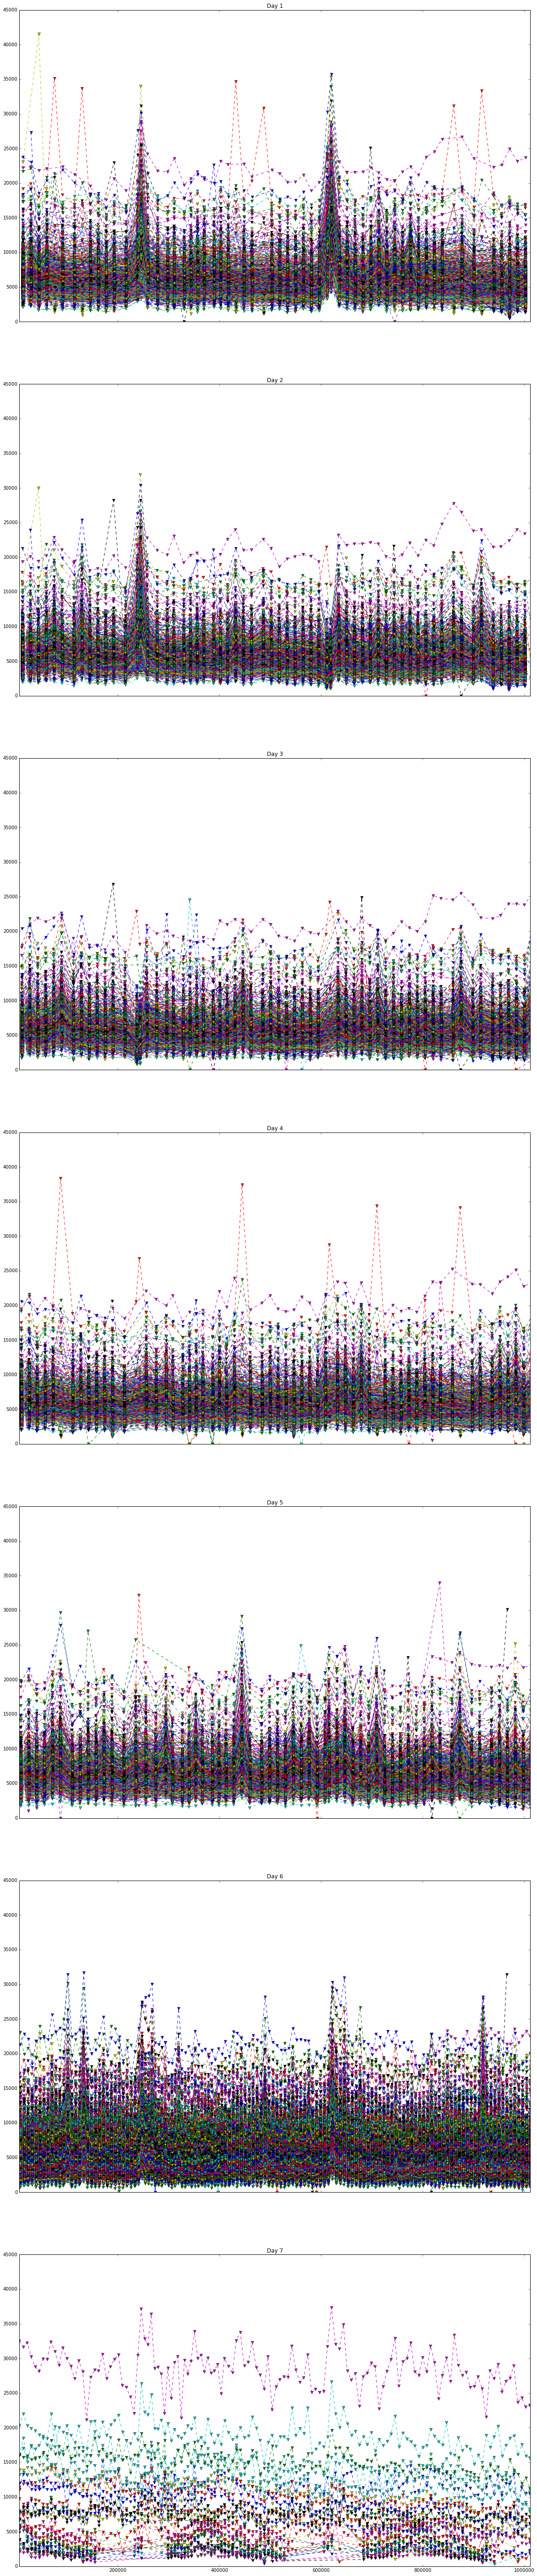

In [46]:
fig, axes = pl.subplots(nrows=7, ncols=1, sharex=True, sharey=True, figsize=(20,100))
for day_of_week in range(1, 8):
    axes[day_of_week - 1].set_title('Day ' + str(day_of_week))
    
    custom_df = train[(train['Open'] == 1) & (train['Promo'] == 0) & (train['DayOfWeek'] == day_of_week)]
    gp_store = custom_df.groupby('Store')
    
    for groupid, df in gp_store:
        df.set_index('Date')
        ts = pd.Series(df['Sales'], index=df.index)
        ts.plot(style='v--', ax=axes[day_of_week - 1])
    
#     gp_date = custom_df.groupby('Date')
    
#     ts = gp_date['Sales'].mean()
#     ts.plot(style='r-', linewidth=10, ax=axes[day_of_week - 1])
